<a href="https://colab.research.google.com/github/yagyeshgoyal/Bhopal-LULC/blob/main/Bhopallulc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Total pixels in image: 59192

Bhopal 2005-06 Map:


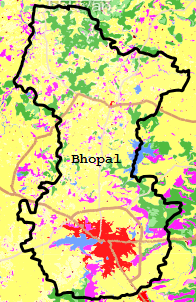


Bhopal 2005-06 Land Classification Table:
+--------------+---------------+----------------+
| Land Type    |   Pixel Count |   Area (sq km) |
+==============+===============+================+
| Urban        |          1732 |         1.5588 |
+--------------+---------------+----------------+
| Water Bodies |            79 |         0.0711 |
+--------------+---------------+----------------+
| Forest       |          6118 |         5.5062 |
+--------------+---------------+----------------+
| Agriculture  |         14511 |        13.0599 |
+--------------+---------------+----------------+
| Wasteland    |          2978 |         2.6802 |
+--------------+---------------+----------------+
| Black Area   |           490 |         0.441  |
+--------------+---------------+----------------+


Total pixels in image: 62310

Bhopal 2015-16 Map:


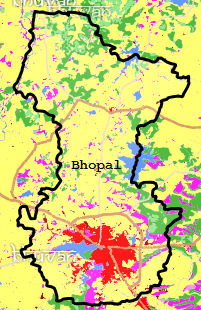


Bhopal 2015-16 Land Classification Table:
+--------------+---------------+----------------+
| Land Type    |   Pixel Count |   Area (sq km) |
+==============+===============+================+
| Urban        |          2322 |         2.0898 |
+--------------+---------------+----------------+
| Water Bodies |           120 |         0.108  |
+--------------+---------------+----------------+
| Forest       |          6379 |         5.7411 |
+--------------+---------------+----------------+
| Agriculture  |         17956 |        16.1604 |
+--------------+---------------+----------------+
| Wasteland    |          2260 |         2.034  |
+--------------+---------------+----------------+
| Black Area   |          2689 |         2.4201 |
+--------------+---------------+----------------+

Change in Land Classification (2005-06 to 2015-16):
+--------------+------------------------+------------------------+------------------+---------------------+
| Land Type    |   Area 2005-06 (sq km) |   Ar

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # for displaying image
from tabulate import tabulate  # Library for table formatting

# Define color ranges in HSV (Hue-Saturation-Value) format
color_ranges = {
    "Urban": [(0, 120, 70), (10, 255, 255)],  # Red -> Urban
    "Water Bodies": [(100, 150, 50), (140, 255, 255)],  # Blue -> Water Bodies
    "Forest": [(40, 40, 40), (80, 255, 255)],  # Green -> Forest
    "Agriculture": [(20, 100, 100), (30, 255, 255)],  # Yellow -> Agriculture
    "Wasteland": [(140, 50, 50), (160, 255, 255)],  # Light Purple -> Wasteland
    "Black Area": [(0, 0, 0), (180, 255, 30)]  # Black -> Barren/Built-up Area
}

def detect_black_border(image):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 50, 150)

    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    mask = np.zeros_like(gray)

    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    return mask

def get_land_data(image_path):

    image = cv2.imread(image_path)
    total_pixels = image.shape[0] * image.shape[1]
    print(f"\n\nTotal pixels in image: {total_pixels}")

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert BGR to HSV
    land_data = []


    black_border_mask = detect_black_border(image)

    for land_type, (lower, upper) in color_ranges.items():
        lower = np.array(lower, dtype=np.uint8)
        upper = np.array(upper, dtype=np.uint8)

        mask = cv2.inRange(hsv, lower, upper)

        mask[black_border_mask == 0] = 0

        pixel_count = np.count_nonzero(mask)

        area = round(pixel_count * 0.0009, 4)

        land_data.append([land_type, pixel_count, area])

    return image, land_data

# Process 2005-06 Image
image_2005, land_data_2005 = get_land_data("/content/bhopal2005picture.png")
print("\nBhopal 2005-06 Map:")
cv2_imshow(image_2005)
headers = ["Land Type", "Pixel Count", "Area (sq km)"]
print("\nBhopal 2005-06 Land Classification Table:")
print(tabulate(land_data_2005, headers, tablefmt="grid"))

# Process 2015-16 Image
image_2015, land_data_2015 = get_land_data("/content/bhopal2015picture.png")
print("\nBhopal 2015-16 Map:")
cv2_imshow(image_2015)
print("\nBhopal 2015-16 Land Classification Table:")
print(tabulate(land_data_2015, headers, tablefmt="grid"))

# Compute Changes in Area
change_data = []
for i in range(len(land_data_2005)):
    land_type = land_data_2005[i][0]
    area_2005 = land_data_2005[i][2]
    area_2015 = land_data_2015[i][2]
    area_change = round(area_2015 - area_2005, 4)

    if area_2005 != 0:
        percentage_change = round((area_change / area_2005) * 100, 2)
    else:
        percentage_change = "N/A"

    change_data.append([land_type, area_2005, area_2015, area_change, f"{percentage_change}%"])

headers = ["Land Type", "Area 2005-06 (sq km)", "Area 2015-16 (sq km)", "Change (sq km)", "Percentage Change"]
print("\nChange in Land Classification (2005-06 to 2015-16):")
print(tabulate(change_data, headers, tablefmt="grid"))
